In [1]:
import numpy as np

def cubicSpline(x_i, y_i):
    n = len(x_i)
    h = x_i[1:] - x_i[:-1]                # (n-1,)

    # Monta A e rhs para n-2 nós internos
    u   = 2*(h[:-1] + h[1:])             # (n-2,)
    rhs = 6*((y_i[2:] - y_i[1:-1])/h[1:]
           - (y_i[1:-1] - y_i[:-2])/h[:-1])  # (n-2,)

    A = np.diag(u)
    A += np.diag(h[1:-1],   k=-1)
    A += np.diag(h[1:-1],   k=+1)

    # resolve M (z)
    z = np.zeros(n)
    z[1:-1] = np.linalg.solve(A, rhs)

    # coeficientes
    d = y_i[:-1]
    c = z[:-1] / 2
    b = (y_i[1:] - y_i[:-1]) / h - h*(2*z[:-1] + z[1:])/6
    a = (z[1:] - z[:-1]) / (6*h)
    


# Pontos de entrada
x_i = np.array([0, 1, 2, 3, 4])
y_i = np.array([0, 1, 0, 1, 0])

# Calcular os coeficientes da spline cúbica natural
a, b, c, d = cubicSpline(x_i, y_i)

# Avaliar a spline em um ponto específico
x_val = 2.5
y_val = spline(x_val, x_i, a, b, c, d)
print(f"Spline({x_val}) = {y_val}")

# Avaliar a spline em vários pontos
x_dense = np.linspace(x_i[0], x_i[-1], 100)
y_dense = [spline(x, x_i, a, b, c, d) for x in x_dense]

# Plotar o resultado
import matplotlib.pyplot as plt
plt.plot(x_i, y_i, 'o', label='Pontos originais')
plt.plot(x_dense, y_dense, label='Spline cúbica')
plt.legend()
plt.show()

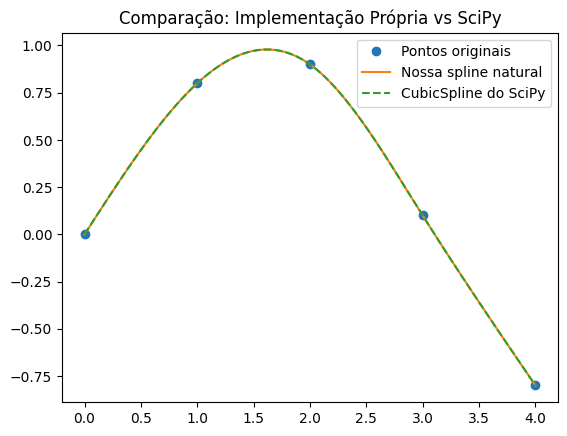

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def cubicSpline_natural(x_i, y_i):
    """
    Implementação de spline cúbica natural.
    Retorna uma função que avalia a spline em quaisquer pontos dentro do intervalo [x_i[0], x_i[-1]].
    """
    n = len(x_i)
    h = x_i[1:] - x_i[:-1]                # (n-1,)

    # Monta A e rhs para n-2 nós internos
    u   = 2*(h[:-1] + h[1:])             # (n-2,)
    rhs = 6*((y_i[2:] - y_i[1:-1])/h[1:]
           - (y_i[1:-1] - y_i[:-2])/h[:-1])  # (n-2,)

    A = np.diag(u)
    A += np.diag(h[1:-1],   k=-1)
    A += np.diag(h[1:-1],   k=+1)

    # resolve M (z)
    z = np.zeros(n)
    z[1:-1] = np.linalg.solve(A, rhs)

    # coeficientes
    d = y_i[:-1]
    c = z[:-1] / 2
    b = (y_i[1:] - y_i[:-1]) / h - h*(2*z[:-1] + z[1:])/6
    a = (z[1:] - z[:-1]) / (6*h)

    def S(x):
        x = np.atleast_1d(x)
        y = np.zeros_like(x, dtype=float)
        for j, xv in enumerate(x):
            i = np.searchsorted(x_i, xv) - 1
            if i < 0:
                i = 0
            elif i > n-2:
                i = n-2
            dx = xv - x_i[i]
            # ordem: constante d, linear b, quadrática c, cúbica a
            y[j] = d[i] + b[i]*dx + c[i]*dx**2 + a[i]*dx**3
        # se quiser devolver escalar quando x for escalar:
        return y[0] if y.shape==(1,) else y


    return S

# Exemplo de uso
x_i = np.array([0, 1, 2, 3, 4], dtype=float)
y_i = np.array([0, 0.8, 0.9, 0.1, -0.8], dtype=float)

# Nossa spline natural
spline_ours = cubicSpline_natural(x_i, y_i)

# Spline do SciPy para comparação
cs = CubicSpline(x_i, y_i, bc_type='natural')

# Pontos densos para avaliação e plotagem
x_dense = np.linspace(x_i[0], x_i[-1], 200)
y_ours = spline_ours(x_dense)
y_scipy = cs(x_dense)

# Plotagem comparativa
plt.plot(x_i, y_i, 'o', label='Pontos originais')
plt.plot(x_dense, y_ours, label='Nossa spline natural')
plt.plot(x_dense, y_scipy, '--', label='CubicSpline do SciPy')
plt.legend()
plt.title('Comparação: Implementação Própria vs SciPy')
plt.show()
